## Final Project Submission

Please fill out:
* Student name: Ian Musau, Mathew Karani, Jacinta Chepkemoi, Christine Malinga and Tabitha Berum.
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


Data Preparation


In [26]:
# import necessary libraries
import pandas as pd
import numpy as np


In [27]:
#Loading the dataset
house_data=pd.read_csv("data/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
#loading the summary metadata
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [29]:
#checking for duplicates
def check_duplicates(dataset):
    duplicates = dataset.duplicated()
    if duplicates.any():
        duplicated_rows = dataset[duplicates]
        print("Duplicate rows:")
        print(duplicated_rows)
    else:
        print("No duplicates found.")
check_duplicates(house_data)

No duplicates found.


In [30]:
#checking for missing values
def check_missing_values(dataset):
    missing_values = dataset.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

check_missing_values(house_data)

Missing values found:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [31]:
#loading summary statistics for each column
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
#dropping the rows with the missing values in the view column
def drop_missing_view_rows(dataset):
    dataset.dropna(subset=['view'], inplace=True)

In [33]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [34]:
#converting the waterfront and year renovated columns to integers
def convert_string_to_int(dataset, columns):
    for column in columns:
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
columns_to_convert = ['waterfront', 'yr_renovated'] 
convert_string_to_int(house_data, columns_to_convert)

In [35]:
# Replace missing values in 'waterfront' and 'yr_renovated' columns with the mean
def replace_missing_with_mean_for_columns(dataset, columns):
    for column in columns:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

columns_to_replace = ['waterfront', 'yr_renovated'] 
replace_missing_with_mean_for_columns(house_data, columns_to_replace)


In [36]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
#reloading the data set
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [38]:
drop_missing_view_rows(house_data)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long       

In [39]:
#Dropping the waterfront column since it contains missing values
house_data.drop('waterfront', axis=1, inplace=True)

# Verify the changes
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

Checking for outliers

In [40]:
def detect_outliers_iqr(df, threshold=1.5):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outliers[column] = df.loc[outlier_indices]
    return outliers


outliers_dict = detect_outliers_iqr(house_data, threshold=2.0)

# Print outliers for each column
for column, outliers_df in outliers_dict.items():
    print(outliers_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []


               id        date      price  bedrooms  bathrooms  sqft_living  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
125    4389200955    3/2/2015  1450000.0         4       2.75         2750   
153    7855801670    4/1/2015  2250000.0         4       3.25         5180   
...           ...         ...        ...       ...        ...          ...   
21535  1561750040  12/24/2014  1380000.0         5       4.50         4350   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4850   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   

       sqft_lot  floors       view  condition         grade  sq

Replacing the outliers with the mean

In [41]:
def replace_outliers_with_mean(df, threshold=1.5):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Replace outliers with the mean
            outlier_indices = (df[column] < lower_bound) | (df[column] > upper_bound)
            df.loc[outlier_indices, column] = df[column].mean()
    return df

house_data_cleaned = replace_outliers_with_mean(house_data, threshold=1.5)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  float64
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  float64
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  float64
 6   sqft_lot       21534 non-null  float64
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  float64
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  float64
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  float64
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

Data Understanding

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
# Load the dataset into a pandas DataFrame
house_data = pd.read_csv('data\kc_house_data.csv')


In [44]:
# Info of Data
inf = house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# EDA

First we further refine the dataset to make it more suitable for visualization. Unused columns are dropped and price formatted to thousands.

In [70]:
eda_df = house_data_cleaned.copy()
eda_df.drop("date", axis=1, inplace=True)
eda_df.drop("id", axis=1, inplace=True)
eda_df.price = eda_df.price / 1000
eda_df.sqft_basement = eda_df.sqft_basement.apply(lambda x : 0 if x == "?" else x)
eda_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,NONE,Average,7 Average,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,NONE,Average,7 Average,2170.0,400.0,1951.0,83.742215,98125.0,47.7210,-122.319,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,NONE,Average,6 Low Average,770.0,0.0,1933.0,83.742215,98028.0,47.7379,-122.233,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,NONE,Very Good,7 Average,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,NONE,Average,8 Good,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


Then we get a breakdown of the data in the price column.

In [72]:
eda_df.price.describe()

count    21534.000000
mean       480.083506
std        202.673668
min         78.000000
25%        322.000000
50%        450.000000
75%        590.000000
max       1120.000000
Name: price, dtype: float64

Then we reduce the grade column to only the number rating for visualization.

In [73]:
eda_df.grade = eda_df.grade.apply(lambda x : x.split(" ")[0].strip())
eda_df.grade.value_counts()

grade
7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: count, dtype: int64

Some functions were created to convert categorical columns to a numerical data type.

In [74]:
def column_values_list(column):
    return list(dict(eda_df[column].value_counts().items()))

def str_column_to_int(column):
    replacement = 0
    for value in column_values_list(column):
        eda_df[column] = eda_df[column].apply(lambda x : replacement if x == value else x)
        replacement += 1

We then change the categorical column "view" to a numerical one.

In [75]:
eda_df.view.value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [79]:
str_column_to_int("view")
eda_df.view.value_counts()

view
0    19422
1      957
2      508
3      330
4      317
Name: count, dtype: int64

Categorical column "condition" is also changed to a numeric value.

In [78]:
str_column_to_int("condition")
eda_df.condition.value_counts()

condition
0    13981
1     5657
2     1697
3      170
4       29
Name: count, dtype: int64

We then view the correlation of price against various columns.

In [58]:
eda_df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.581669
grade            0.573017
sqft_living15    0.508827
sqft_above       0.474044
lat              0.432947
bathrooms        0.424381
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
long             0.092386
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
zipcode         -0.021363
Name: price, dtype: float64

#### Observations

It seems that living area square footage is the most correlated with the price of the house. Conversely, the zipcode and condition of the house are negatively correlated with the price. This indicates that asa they increase, the price of the house decreases.

### Visualizations

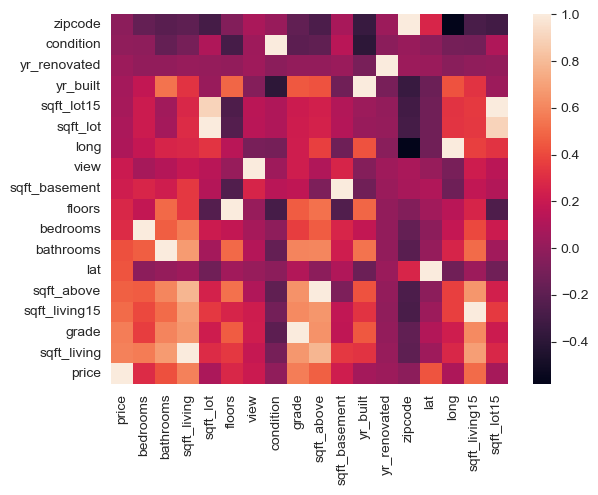

In [81]:
import seaborn as sns

sns.set_style("darkgrid")

corr_matrix = eda_df.corr().sort_values("price")
sns.heatmap(corr_matrix);

### Observations

The heat map confirms the correlation table we saw before.

A function was created to visualize price against various columns.

In [65]:
def price_vs_column(column, alias, reg = True):
    if reg:
        ax = sns.regplot(
            x=eda_df[column],
            y=eda_df.price,
            line_kws={
                "color" : "green"
            }
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );
    else:
        ax = sns.scatterplot(
            x=eda_df[column],
            y=eda_df.price,
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );

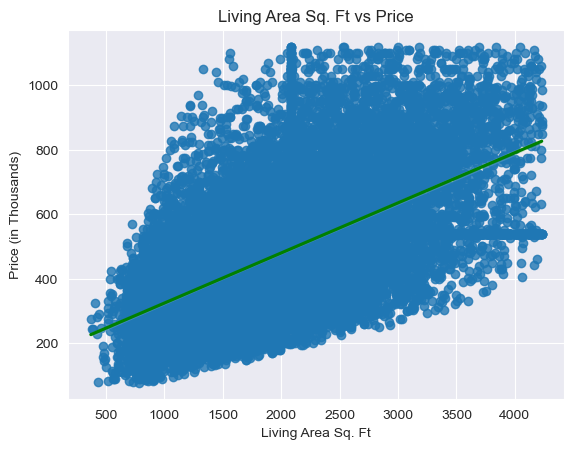

In [66]:
price_vs_column("sqft_living", "Living Area Sq. Ft")

### Observations

We see that as living area square footage increases, so does the price.

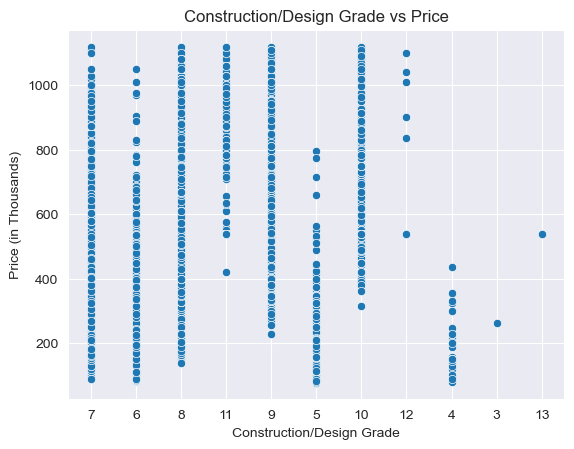

In [68]:
price_vs_column("grade", "Construction/Design Grade", reg=False)

### Observations

All grades contain prices across the whole spectrum.

Next, we view the effect of number of bedrooms on price.

bedrooms
3.000000    9791
4.000000    6865
2.000000    2754
5.000000    1596
3.373038     528
Name: count, dtype: int64


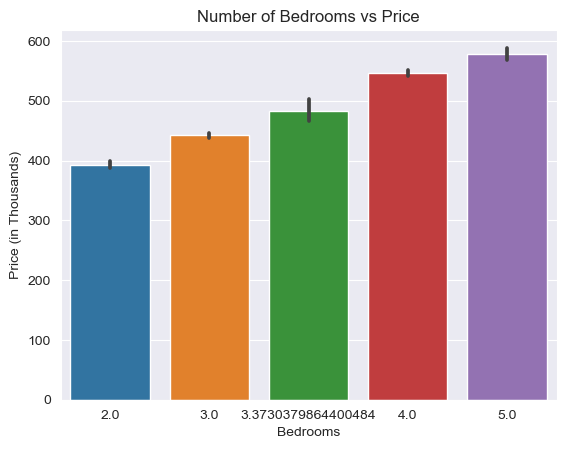

In [86]:
print(eda_df.bedrooms.value_counts())
ax = sns.barplot(x=eda_df.bedrooms, y=eda_df.price)
ax.set(
    xlabel = "Bedrooms",
    ylabel = "Price (in Thousands)",
    title = "Number of Bedrooms vs Price"
);

### Observations

As the number of bedrooms increases, so does the average price, but the most popular choice among customers was 3 bedrooms.